In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import os

In [12]:
data_dir = "../00_Data/ERA5_2mTemp_19900101-19900531_00h.nc"

In [13]:
ds = xr.open_dataset(data_dir)

In [14]:
ds

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, time: 151)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
    expver     int32 ...
  * time       (time) datetime64[ns] 1990-01-01 1990-01-02 ... 1990-05-31
Data variables:
    t2m        (time, latitude, longitude) float32 ...

### As we need monthly mean temperature, grouping the xarray dataset by month will ease up our operation.

In [5]:
ds.groupby("time.month")

DatasetGroupBy, grouped over 'month'
5 groups with labels 1, 2, 3, 4, 5.

In [6]:
monthly_mean = ds.groupby("time.month").mean()
monthly_mean

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, month: 5)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
    expver     int32 1
  * month      (month) int64 1 2 3 4 5
Data variables:
    t2m        (month, latitude, longitude) float32 256.1 256.1 ... 218.8 218.8

### Renaming the months from integer values to actual name

In [16]:
# Month names
month_names = ["January", "February", "March", "April", "May"]

# Assigning month names to the 'month' coordinate
monthly_mean['month'] = month_names
monthly_mean

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, month: 5)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
    expver     int32 1
  * month      (month) <U8 'January' 'February' 'March' 'April' 'May'
Data variables:
    t2m        (month, latitude, longitude) float32 256.1 256.1 ... 218.8 218.8

In [17]:
monthly_mean = monthly_mean.sel(month=["January", "February", "March", "April", "May"])
monthly_mean

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, month: 5)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
    expver     int32 1
  * month      (month) <U8 'January' 'February' 'March' 'April' 'May'
Data variables:
    t2m        (month, latitude, longitude) float32 256.1 256.1 ... 218.8 218.8

### Plotting the Global Mean Temperature Maps for January to May 1990

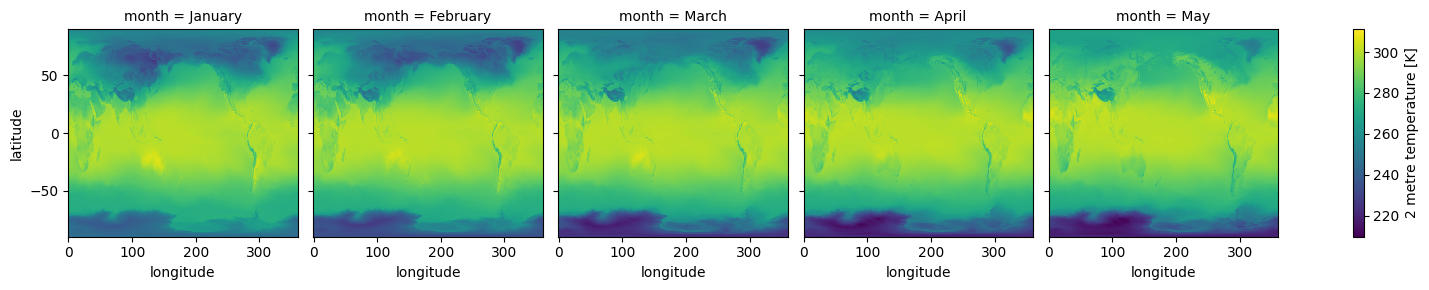

In [32]:
plot = monthly_mean.t2m.plot(col="month")

plt.savefig("../02_Outputs/T3_Monthly_Global_Mean_Temperature_Maps.png")

plt.show()